 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st

# to handle file imports for different OS
import os
from pathlib import Path 

In [2]:
folder = Path(os.getcwd())
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read_csv(file2)

In [3]:
#print(dseng_df)
print(summary_month_df)

     Month                Car  miles driven in autonomous mode  \
0   14-Sep  WDD2221851A001072                             4207   
1   14-Oct  WDD2221851A001072                            23971   
2   14-Nov  WDD2221851A001072                            15837   
3   14-Dec  WDD2221851A001072                             9413   
4   15-Jan  WDD2221851A001072                            18192   
5   15-Feb  WDD2221851A001072                            18745   
6   15-Mar  WDD2221851A001072                            22204   
7   15-Apr  WDD2221851A001072                            31927   
8   15-May  WDD2221851A001072                            38017   
9   15-Jun  WDD2221851A001072                            42047   
10  15-Jul  WDD2221851A001072                            34805   
11  15-Aug  WDD2221851A001072                            38220   
12  15-Sep  WDD2221851A001072                            36327   
13  15-Oct  WDD2221851A001072                            47144   
14  15-Nov

In [4]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

### 2 (a) Total number of AV disengagements: 1024

In [5]:
dseng_df['Month_actual'] = dseng_df['Month'].apply(lambda x:x.split("-")[1])

In [6]:
dseng_df['Month'].nunique()

15

### 2 (b) Number of unique months that have recorded AV disengagements: 15

In [7]:
dseng_df['Location'].nunique()

2

### 2 (c) List of unique locations of AV disengagements: 2

In [8]:
dseng_df['Cause'].nunique()

10

### 2 (d) Number of unique causes for AV disengagements: 10 

In [9]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
Month_actual       0
dtype: int64

### 2 (e) ReactionTime has 532 missing values because Manual Trigger

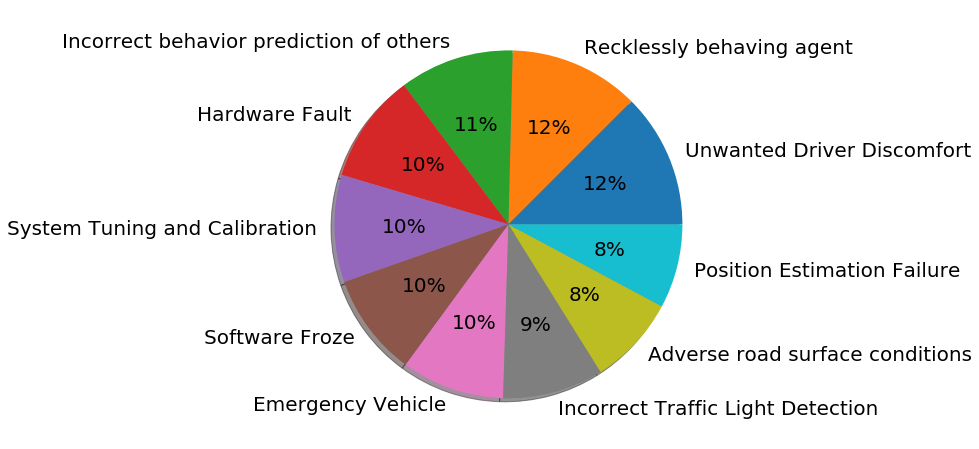

In [10]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

### 3 The top two leading causes of disengagement: Recklessly behaving agent and Unwanted Driver Discomfort

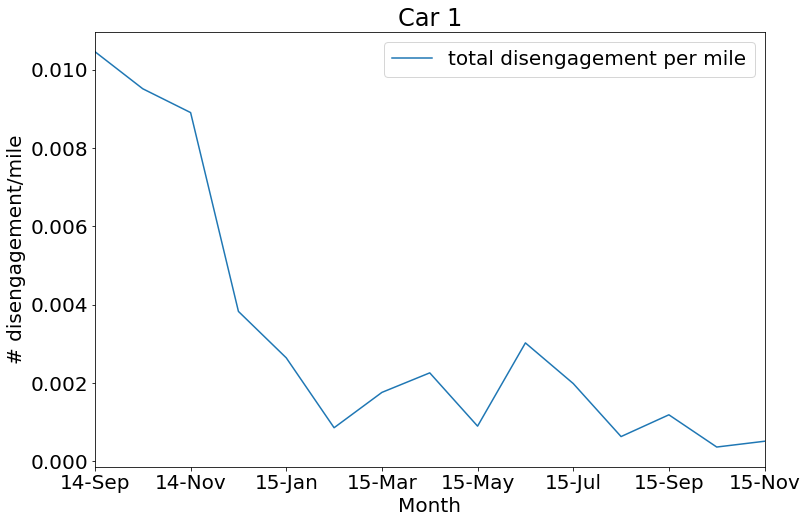

In [11]:
#disengagement/mile
summary_month_df['total disengagement per mile'] = summary_month_df['total number of disengagements']\
/summary_month_df['miles driven in autonomous mode']

#print(summary_month_df['total disengagement per mile'])

summary_month_df.iloc[:15,:].plot(x = 'Month',y = 'total disengagement per mile')
plt.xlabel('Month')
plt.ylabel('# disengagement/mile')
plt.title('Car 1')
plt.show()

### 4 AVs are indeed maturing over time

# Task 1